In [19]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

In [20]:
data = pd.read_csv("OnlineRetail.csv", encoding="ISO-8859-1")
data

InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

            InvoiceDate  UnitPrice  CustomerID         Country  
0        12/1/2010 8:26       2.55     17850.0  United Kingdom  
1        12/1/2010 8:26       3.39     17850.0  United Kingdom  
2        12/1/2010 8:26       2.75     17850.0  United Kingdom  
3        12/1/2010 8:26       3.39     17850.0  United Kingdom  
4        12/1/2010 8:26       3.39     17850.0  United Kingdom  
...                 ...        ...         ...             ...  
541904  12/9/2011 12:50       0.85     12680.0          France  
541905  12/9/2011 12:50       2.10     12680.0          France  
541906  12/9/2011 12:50       4.15     12680.0          France  
541907  12/9/2011 12:50       4.15     12680.0          France  
541908  12/9/2011 12:50       4.95     12680.0          France  

[541909 rows x 8 columns]

In [21]:
data.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/2010 8:26       2.55     17850.0  United Kingdom  
1  12/1/2010 8:26       3.39     17850.0  United Kingdom  
2  12/1/2010 8:26       2.75     17850.0  United Kingdom  
3  12/1/2010 8:26       3.39     17850.0  United Kingdom  
4  12/1/2010 8:26       3.39     17850.0  United Kingdom

In [22]:
data.describe()

Quantity      UnitPrice     CustomerID
count  541909.000000  541909.000000  406829.000000
mean        9.552250       4.611114   15287.690570
std       218.081158      96.759853    1713.600303
min    -80995.000000  -11062.060000   12346.000000
25%         1.000000       1.250000   13953.000000
50%         3.000000       2.080000   15152.000000
75%        10.000000       4.130000   16791.000000
max     80995.000000   38970.000000   18287.000000

In [23]:
data.dropna(inplace=True)
data.isna().sum()
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  object 
 1   StockCode    406829 non-null  object 
 2   Description  406829 non-null  object 
 3   Quantity     406829 non-null  int64  
 4   InvoiceDate  406829 non-null  object 
 5   UnitPrice    406829 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      406829 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.9+ MB


In [24]:
data.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [25]:
data['Total_Amount' ] = data['Quantity']*data['UnitPrice' ]

In [26]:
data['Total_Amount'] = data['Quantity' ]*data['UnitPrice' ]

In [27]:
m = data.groupby('CustomerID' ) [ 'Total_Amount' ]. sum()
m = pd. DataFrame(m) .reset_index()
m. head()

CustomerID  Total_Amount
0     12346.0          0.00
1     12347.0       4310.00
2     12348.0       1797.24
3     12349.0       1757.55
4     12350.0        334.40

In [28]:
f = data.groupby('CustomerID') ['InvoiceNo' ]. count()
f = f.reset_index()
f.columns = ['CustomerID' ,'Frequency' ]
f.head()

CustomerID  Frequency
0     12346.0          2
1     12347.0        182
2     12348.0         31
3     12349.0         73
4     12350.0         17

In [29]:
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'], format='%m/%d/%Y %H:%M' )
last_day = max(data['InvoiceDate' ])

In [30]:
data['difference'] = last_day - data['InvoiceDate']
data.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  Total_Amount  \
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom         15.30   
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom         20.34   
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom         22.00   
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom         20.34   
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom         20.34   

         difference  
0 373 days 04:24:00  
1 373 days 04:24:00  
2 373 days 04:24:00  
3 373 days 04:24:00  
4 373 days 04:24:00

In [31]:
def get_days(x):
    y = str(x).split()[0]
    return int(y)
data['difference' ] = data['difference'].apply(get_days)

In [32]:
r = data.groupby('CustomerID' ) ['difference' ].min()
r = r.reset_index()
r.columns = ['CustomerID' ,'Recency' ]
r.head()

CustomerID  Recency
0     12346.0      325
1     12347.0        1
2     12348.0       74
3     12349.0       18
4     12350.0      309

In [33]:
group_df = pd. merge(m, f, on='CustomerID', how='inner')
RFM_df = pd.merge(group_df, r, on='CustomerID', how='inner' )
RFM_df.columns = ['CustomerId', 'Monetary' ,'Frequency' , 'Recency' ]

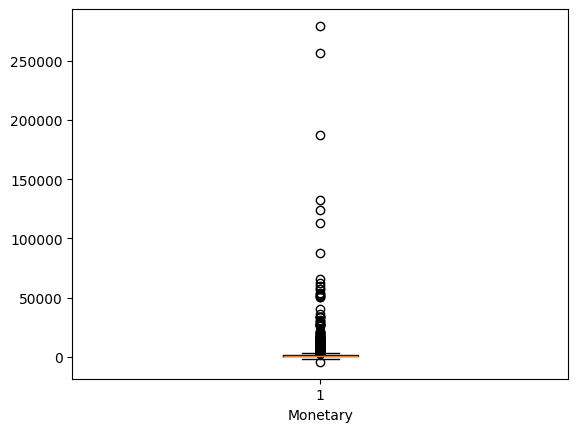

In [34]:
plt.boxplot(RFM_df['Monetary' ])
plt.xlabel('Monetary')
plt.show()

In [35]:
outlier_vars = ['Monetary', 'Recency', 'Frequency' ]
for column in outlier_vars:
    lower_quartile = RFM_df[column].quantile(0.25)
    upper_quartile = RFM_df[column].quantile(0.75)
    iqr = upper_quartile - lower_quartile
    iqr_extended = iqr * 1.5
    min_border = lower_quartile - iqr_extended
    max_border = upper_quartile + iqr_extended
    outliers = RFM_df[(RFM_df[column] < min_border) | (RFM_df[column] > max_border)].index
    print(f"{len(outliers)}Outliers detected in column {column}")
    RFM_df.drop(outliers, inplace=True)

423Outliers detected in column Monetary
81Outliers detected in column Recency
239Outliers detected in column Frequency


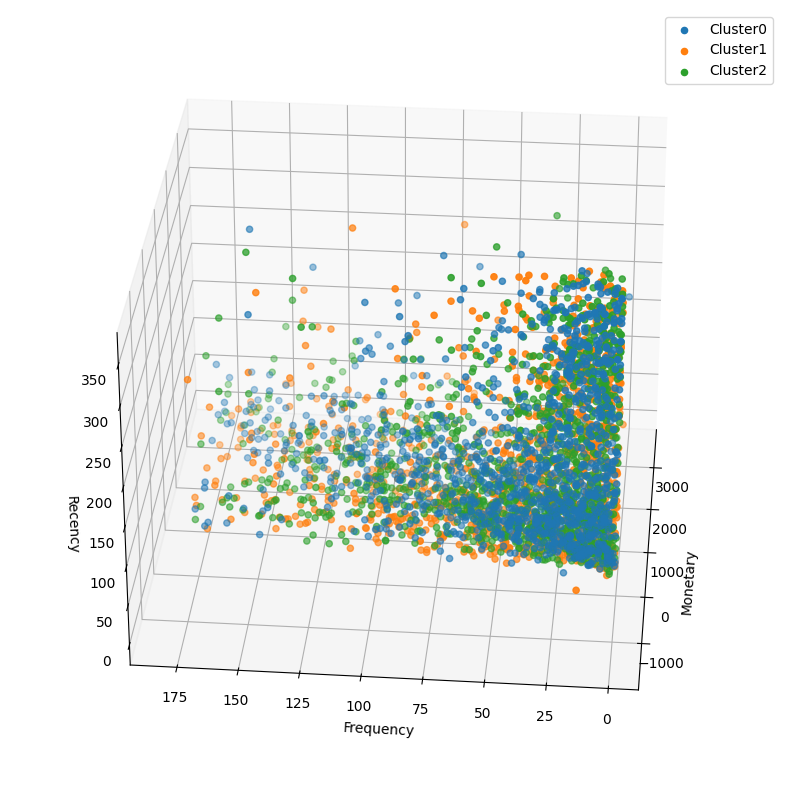

In [41]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(RFM_df)
RFM_df['labels'] = kmeans.labels_

fig = plt.figure(figsize=(21, 10))
ax = fig.add_subplot(111, projection='3d')

for label in range(3):
    ax.scatter(RFM_df["Monetary"][RFM_df['labels'] == label],
               RFM_df["Frequency"][RFM_df['labels' ] == label],
               RFM_df["Recency"][RFM_df['labels' ] == label],
               label=f'Cluster{label}')

ax.set_xlabel('Monetary')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')
ax.view_init(30, 185)
plt.legend()
plt.show()